<a href="https://colab.research.google.com/github/NataMaru/ML_for_people_tasks/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,roc_curve, auc,f1_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import seaborn as sns


дані з Kaggle через api не скачались, в подальшому пофіксю проблему, поки завантажувала з файлів дані.

In [2]:
train_csv  = pd.read_csv('train.csv')
train_csv.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [3]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


у нас відсутні в даних пропущені значення, тому заповнювати нічого не потрібно.
Вирішила перевірити до розподліу, щоб не перевіряти окремо тренувальні і валідаційні.

In [4]:
train_df, val_df = train_test_split(train_csv, test_size=0.2, random_state=42,stratify=train_csv['Exited'])

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [5]:
input_cols=list(train_csv.columns)[1:-1]
target_col='Exited'
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [6]:
#train_targets.value_counts()
#val_targets.value_counts()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [7]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [8]:
train_inputs[numeric_cols].describe().round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,15690923.99,658.84,37.69,5.03,43008.17,1.59,0.79,0.49,117992.40
std,146930.97,72.33,8.14,2.78,59906.63,0.53,0.41,0.50,45589.48
min,1581102.00,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,15635116.00,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,15689953.00,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,15756921.50,708.00,42.00,7.00,109949.05,2.00,1.00,1.00,156912.81
max,15815690.00,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [9]:
train_inputs[categorical_cols].head()

,Surname,Geography,Gender
7180,Mays,France,Male
10393,Ch'eng,France,Female
80,Ch'in,Germany,Male
3365,K?,Spain,Male
12236,Trevisani,France,Male


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

1. видаляємо колонки CustomerId та Surname, оскільки обидві є ідентифікатором клієнта і не впливають на таргет.
2. пропущених значень немає, тому масштабуємо числові колонки, оскільки дані мають різну розмірність
3. категоріальні колонки Geography та Gender кодуємо

In [10]:
#видаляємо колонки CustomerId та Surname, оскільки обидві є ідентифікатором клієнта і не впливають на таргет.
train_inputs = train_inputs.drop(['CustomerId', 'Surname'], axis=1)

val_inputs= val_inputs.drop(['CustomerId', 'Surname'], axis=1)

In [11]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [12]:
#масштабуємо числові колонки, оскільки дані мають різну розмірність

scaler = StandardScaler()
scaler.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [13]:
#категоріальні колонки Geography та Gender кодуємо

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])


In [14]:
train_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.320187,France,Male,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,0.0,1.0
10393,0.347838,France,Female,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,1.0,0.0
80,0.638166,Germany,Male,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,0.0,1.0
3365,0.140460,Spain,Male,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,0.0,1.0
12236,0.665816,France,Male,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,0.0,1.0


In [15]:
val_inputs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.762592,Germany,Male,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,0.0,1.0,0.0,0.0,1.0
3646,-0.910252,France,Male,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,1.0,0.0,0.0,0.0,1.0
5306,0.997620,France,Female,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,1.0,0.0,0.0,1.0,0.0
652,0.195761,France,Female,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,1.0,0.0,0.0,1.0,0.0
2627,0.264887,Spain,Female,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [16]:
!pip install pyarrow --quiet

In [17]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [18]:
#import os
#data_dir = '/content'
#os.listdir(data_dir)

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [19]:
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)


LogisticRegression(solver='liblinear')

In [20]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [21]:
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [22]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.46%


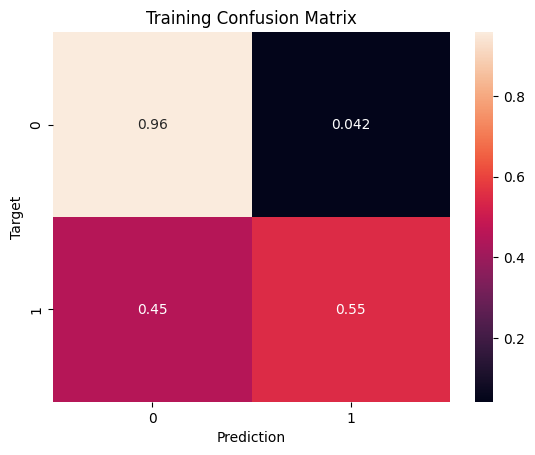

In [23]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 86.97%


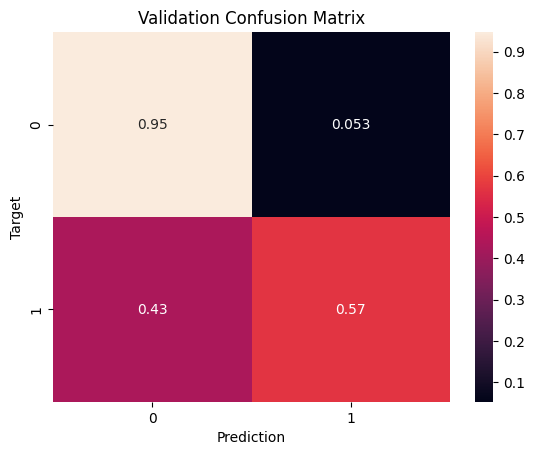

In [24]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [25]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds)
  print(f"F1 score {name}: {f1_score_:.2f}")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')


F1 score Training: 0.64
F1 score Validation: 0.64


In [26]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.5f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.88254


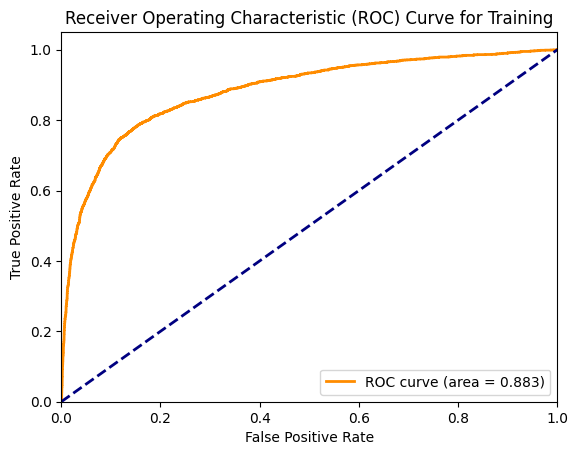

AUROC for Validation: 0.87966


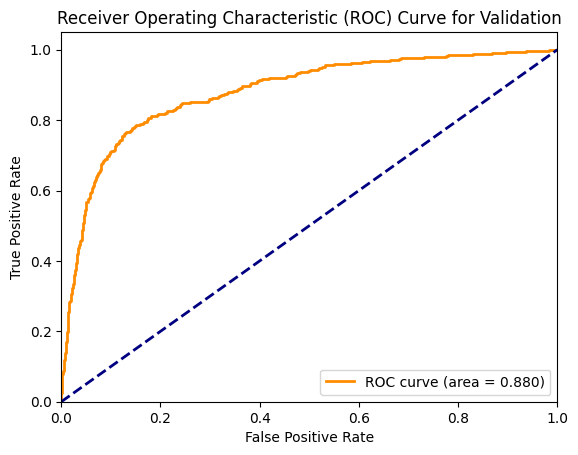

In [27]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

In [28]:
#для себе первіряла показники моделі з різними threshold
#train_probs = model.predict_proba(X_train)[:, 1]
#val_probs = model.predict_proba(X_val)[:, 1]

#custom_threshold = 0.3

# Якщо ймовірність > 0.3, то 1, інакше 0
#train_pred_0_3 = (train_probs >= custom_threshold).astype(int)
#val_pred_0_3 = (val_probs >= custom_threshold).astype(int)
#print(classification_report(train_targets, train_pred_0_3))
#print(classification_report(val_targets, val_pred_0_3))

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [29]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [30]:
acc_tr_no=accuracy_score(train_targets, all_no(train_inputs))
acc_val_no=accuracy_score(val_targets, all_no(val_inputs))
acc_tr=accuracy_score(train_targets, train_preds)
acc_val=accuracy_score(val_targets, val_preds)

print(f"Accuracy_tr_no: {acc_tr_no:.2f}")
print(f"Accuracy_tr: {acc_tr:.2f}")
print(f"Accuracy_val_no: {acc_val_no:.2f}")
print(f"Accuracy_val: {acc_val:.2f}")

Accuracy_tr_no: 0.80
Accuracy_tr: 0.87
Accuracy_val_no: 0.80
Accuracy_val: 0.87



###висновок
Мажоритарний клас дорівнює 0 і якщо порівняти з моделлю яка постійно предіктить 0, то натренована модель на 7% вгадує краще.
Це не дуже високий результат, тож модель можна вважати нормальною, але є куди покращувати.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [31]:
import joblib

In [32]:
bank_predict_churn = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [33]:
joblib.dump(bank_predict_churn, 'bank_predict_churn.joblib')

['bank_predict_churn.joblib']

In [34]:
model_2 = joblib.load('bank_predict_churn.joblib')

In [35]:
#train_preds2 = model_2['model'].predict(X_train)
#accuracy_score(train_targets, train_preds2)
val_preds2 = model_2['model'].predict(X_val)
accuracy_score(val_targets, val_preds2)

0.8696666666666667

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [37]:
def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df = input_df.drop(['CustomerId', 'Surname'], axis=1)
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [38]:
test_raw_df  = pd.read_csv('test.csv')
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [39]:
test_raw_df['Exited']=predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.069393
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.033314
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.153586
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.199192
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.054281


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [41]:
sample_submission  = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,Exited
0,15000,0.069393
1,15001,0.033314
2,15002,0.153586
3,15003,0.199192
4,15004,0.054281


In [42]:
sample_submission['Exited'] = sample_submission['id'].map(test_raw_df.set_index('id')['Exited'])
sample_submission.head()

,id,Exited
0,15000,0.069393
1,15001,0.033314
2,15002,0.153586
3,15003,0.199192
4,15004,0.054281


In [43]:
sample_submission.to_csv('sample_submission.csv', index=False)

In [44]:
sample_submission_new = pd.read_csv('sample_submission.csv')
sample_submission_new.head()

,id,Exited
0,15000,0.069393
1,15001,0.033314
2,15002,0.153586
3,15003,0.199192
4,15004,0.054281
